In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to (0, 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten images to 1D vector (32x32x3 = 3072)
X_train = X_train.reshape((X_train.shape[0], 32 * 32 * 3))
X_test = X_test.reshape((X_test.shape[0], 32 * 32 * 3))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(shape=(32 * 32 * 3,)))

# Hidden layer 1
model.add(layers.Dense(512, activation='relu'))

# Hidden layer 2
model.add(layers.Dense(256, activation='relu'))

# Output layer (10 classes)
model.add(layers.Dense(10, activation='softmax'))


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2735 - loss: 2.0287 - val_accuracy: 0.3670 - val_loss: 1.7490
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3839 - loss: 1.7103 - val_accuracy: 0.3915 - val_loss: 1.7235
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4118 - loss: 1.6378 - val_accuracy: 0.4276 - val_loss: 1.6030
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4315 - loss: 1.5741 - val_accuracy: 0.4213 - val_loss: 1.6197
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4471 - loss: 1.5406 - val_accuracy: 0.4370 - val_loss: 1.5594
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4546 - loss: 1.5141 - val_accuracy: 0.4410 - val_loss: 1.5685
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4766 - loss: 1.4687 - val_accuracy: 0.4552 - val_loss: 1.5485
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4805 - loss: 1.4507 - 

In [7]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4755 - loss: 1.4682
Test accuracy: 0.4778999984264374


In [8]:
# Make predictions
predictions = model.predict(X_test)

# Convert prediction probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to class labels
true_classes = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


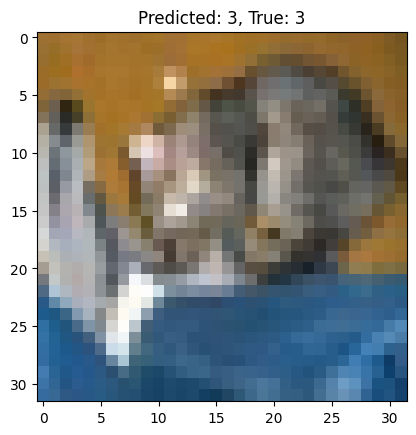

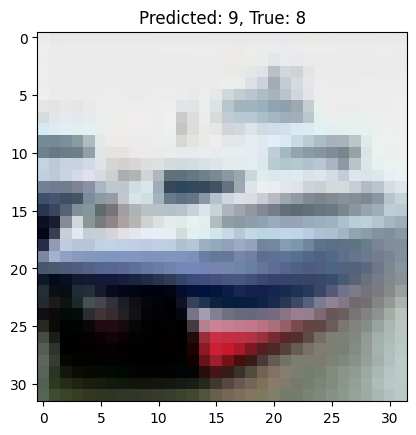

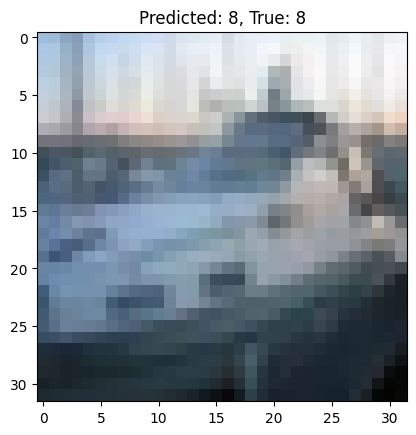

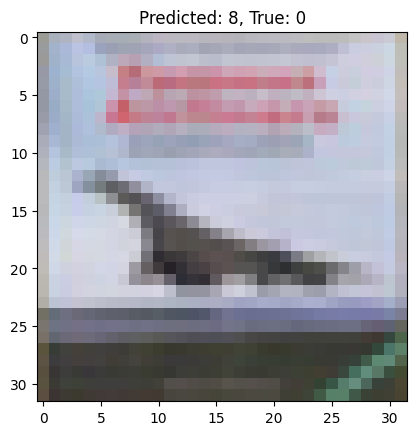

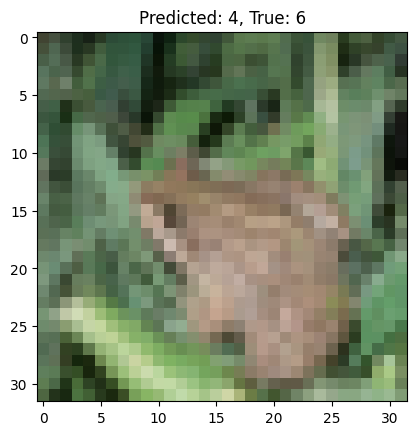

In [9]:
import matplotlib.pyplot as plt

def plot_predictions(index):
    plt.imshow(X_test[index].reshape(32, 32, 3))
    plt.title(f"Predicted: {predicted_classes[index]}, True: {true_classes[index]}")
    plt.show()

# Display predictions for first 5 images
for i in range(5):
    plot_predictions(i)


## This FNN may achieve a reasonable accuracy (~50-60%) on CIFAR-10. For better results, a convolutional neural network (CNN) is typically more suitable for image classification tasks like CIFAR-10.